<a href="https://colab.research.google.com/github/rafaxy/tarefas_AI/blob/main/tarefa_trash_bin_com_transfer_learning_(chatgpt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner
!pip install -q gdown
import os
import zipfile
import gdown
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras_tuner.tuners import Hyperband
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.applications import MobileNetV2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Your code to load and preprocess the images here...

# Download the zip file
url = 'https://drive.google.com/uc?id=1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX'
output = 'trash_nov_22_2018.zip'
gdown.download(url, output, quiet=False)

# Extract the zip file
with zipfile.ZipFile('trash_nov_22_2018.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Create a list of categories
categories = ['trash', 'metal', 'paper', 'plastic', 'glass', 'cardboard']

# Create a list to store images and labels
images = []
labels = []

# Load and preprocess the images
for category in categories:
    for file_name in os.listdir('dataset'):
        if file_name.startswith(category):
            img = load_img(f'dataset/{file_name}', target_size=(224, 224))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(category)


# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

from sklearn.preprocessing import LabelBinarizer

# One-hot encode the labels
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

# Now your labels are one-hot encoded, so you can split them into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



Downloading...
From: https://drive.google.com/uc?id=1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX
To: /content/trash_nov_22_2018.zip
100%|██████████| 42.8M/42.8M [00:00<00:00, 298MB/s]


In [ ]:
def build_model(hp):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base_model.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())

    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(Dense(6, activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = Hyperband(build_model,
                  objective='val_accuracy',
                  max_epochs=30,
                  directory='output',
                  project_name='TrashClassifier')

In [ ]:
# Your code for model training and evaluation here...
# Search for the best model
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Print the performance results for each model as they are being tested
for key in history.history.keys():
    print(key, ' : ', history.history[key])

Epoch 1/10
64/64 [==============================] - 23s 91ms/step - loss: 3.4302 - accuracy: 0.3939 - val_loss: 1.3645 - val_accuracy: 0.5316
Epoch 2/10
64/64 [==============================] - 4s 63ms/step - loss: 1.2181 - accuracy: 0.5666 - val_loss: 1.2796 - val_accuracy: 0.5415
Epoch 3/10
64/64 [==============================] - 4s 63ms/step - loss: 1.1211 - accuracy: 0.5844 - val_loss: 1.2431 - val_accuracy: 0.5968
Epoch 4/10
64/64 [==============================] - 4s 67ms/step - loss: 0.9125 - accuracy: 0.6799 - val_loss: 1.1583 - val_accuracy: 0.6126
Epoch 5/10
64/64 [==============================] - 4s 63ms/step - loss: 0.8229 - accuracy: 0.6957 - val_loss: 1.1502 - val_accuracy: 0.6166
Epoch 6/10
64/64 [==============================] - 3s 54ms/step - loss: 0.6683 - accuracy: 0.7600 - val_loss: 1.1137 - val_accuracy: 0.6462
Epoch 7/10
64/64 [==============================] - 4s 66ms/step - loss: 0.5893 - accuracy: 0.7783 - val_loss: 1.0668 - val_accuracy: 0.6660
Epoch 8/10
6

In [ ]:
tuner.results_summary()


Results summary
Results in output/TrashClassifier
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0006 summary
Hyperparameters:
dense_1_units: 48
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
learning_rate: 0.001
Score: 0.6996047496795654

Trial 0001 summary
Hyperparameters:
dense_1_units: 112
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.6798418760299683

Trial 0002 summary
Hyperparameters:
dense_1_units: 128
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.6324110627174377

Trial 0000 summary
Hyperparameters:
dense_1_units: 96
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.6225296258926392

Trial 0005 summary
Hyperparameters:
dense_1_units: 80
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.6225296258926392

Trial 0004 summary
Hyperparameters:
dense_1_units: 64
tuner/epochs: 2
tuner/initial_epoch: 0
tu

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best hyperparameters:
- dense_1_units: {best_hps.get('dense_1_units')}
- learning_rate: {best_hps.get('learning_rate')}
""")


Best hyperparameters:
- dense_1_units: 48
- learning_rate: 0.001



Epoch 1/20
64/64 [==============================] - 8s 86ms/step - loss: 3.6791 - accuracy: 0.4800 - val_loss: 1.2929 - val_accuracy: 0.6225
Epoch 2/20
64/64 [==============================] - 4s 56ms/step - loss: 0.5688 - accuracy: 0.8021 - val_loss: 0.9244 - val_accuracy: 0.6838
Epoch 3/20
64/64 [==============================] - 4s 64ms/step - loss: 0.2714 - accuracy: 0.9164 - val_loss: 0.9446 - val_accuracy: 0.7154
Epoch 4/20
64/64 [==============================] - 3s 54ms/step - loss: 0.1796 - accuracy: 0.9500 - val_loss: 1.0338 - val_accuracy: 0.6897
Epoch 5/20
64/64 [==============================] - 4s 64ms/step - loss: 0.0905 - accuracy: 0.9802 - val_loss: 0.9291 - val_accuracy: 0.7233
Epoch 6/20
64/64 [==============================] - 4s 64ms/step - loss: 0.0543 - accuracy: 0.9906 - val_loss: 0.8886 - val_accuracy: 0.7352
Epoch 7/20
64/64 [==============================] - 3s 54ms/step - loss: 0.0387 - accuracy: 0.9946 - val_loss: 1.0556 - val_accuracy: 0.7213
Epoch 8/20
64

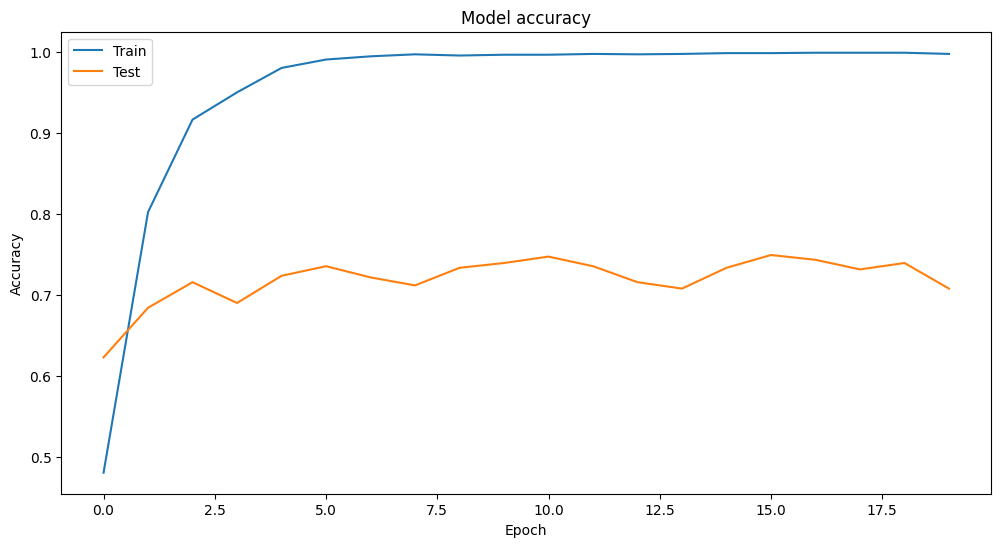

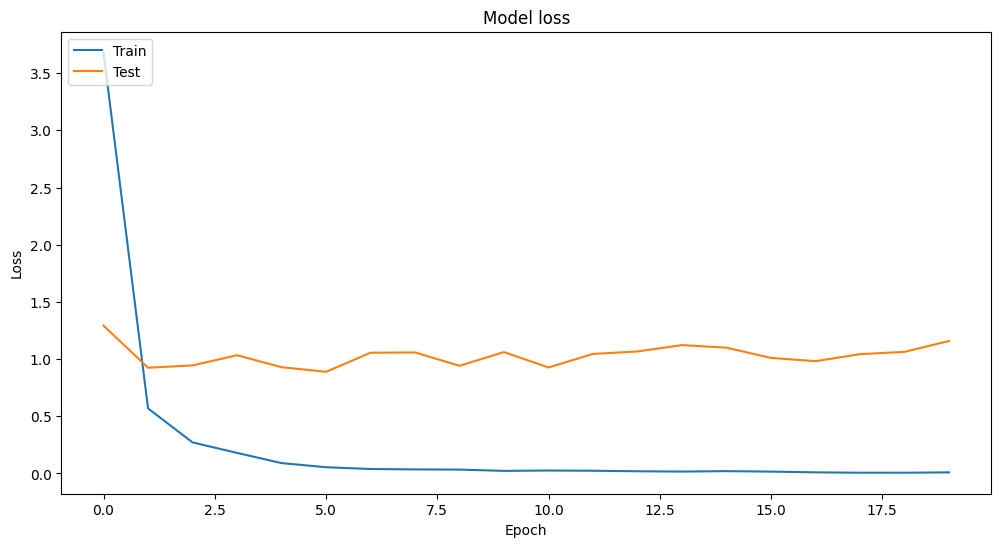

In [ ]:
# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Accuracy vs Epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss vs Epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Get the model's predictions for the test set
y_pred = model.predict(X_test)

# Convert the predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the test set labels from one-hot encoded to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Get the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Convert the confusion matrix to a DataFrame. This is mainly done to label the indices and columns
cm_df = pd.DataFrame(cm, index=categories, columns=categories)

# Print the confusion matrix
print(cm_df)


16/16 [==============================] - 3s 42ms/step
           trash  metal  paper  plastic  glass  cardboard
trash         68      3      3        2      2          0
metal          6     80     12        0      4          0
paper          2     15     69        2      2          0
plastic        9      2      8       82     10          7
glass          6     19     16        7     50          0
cardboard      1      2      5        2      1          9


In [ ]:
# Convert the test set labels from one-hot encoded to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Count the occurrences of each label in y_test_classes
label_counts = np.bincount(y_test_classes)

# Create a dictionary to store label counts
label_counts_dict = {categories[i]: count for i, count in enumerate(label_counts)}

# Print the label counts
for label, count in label_counts_dict.items():
    print(f'{label}: {count}')



trash: 78
metal: 102
paper: 90
plastic: 118
glass: 98
cardboard: 20


In [ ]:
from sklearn.metrics import classification_report

# Get the model's predictions for the test set
y_pred = model.predict(X_test)

# Convert the predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the test set labels from one-hot encoded to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Compute the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=categories)

# Print the classification report
print(report)


16/16 [==============================] - 1s 41ms/step
              precision    recall  f1-score   support

       trash       0.74      0.87      0.80        78
       metal       0.66      0.78      0.72       102
       paper       0.61      0.77      0.68        90
     plastic       0.86      0.69      0.77       118
       glass       0.72      0.51      0.60        98
   cardboard       0.56      0.45      0.50        20

    accuracy                           0.71       506
   macro avg       0.69      0.68      0.68       506
weighted avg       0.72      0.71      0.70       506



Acurácia: A acurácia é a medida de desempenho mais intuitiva. Ela é simplesmente a razão entre as observações corretamente previstas e o total de observações.

Acurácia = (Verdadeiros Positivos + Verdadeiros Negativos) / Total de Observações

No entanto, a acurácia não é uma boa escolha para distribuições de classes desbalanceadas. Em casos onde uma classe é muito mais comum que a outra, um modelo poderia prever a classe majoritária para todas as previsões e ainda assim ter uma alta acurácia.

Precisão: A precisão é a razão entre as observações positivas corretamente previstas e o total de previsões positivas. Também é conhecida como Valor Preditivo Positivo.

Precisão = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivos)

Alta precisão está relacionada a uma baixa taxa de falsos positivos. Indica a porcentagem de suas previsões que estavam corretas. A precisão é uma boa medida para determinar quando os custos de um falso positivo são altos.

Recall (Sensibilidade): O recall é a razão entre as observações positivas corretamente previstas e todas as observações na classe real - sim. Também é chamado de Sensibilidade, Taxa de Acerto, ou Taxa de Verdadeiros Positivos.

Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)

O recall mede a capacidade de um modelo de encontrar todos os casos relevantes em um conjunto de dados. O recall seria a habilidade do modelo de encontrar todos os pontos de interesse em um conjunto de dados.

F1-Score: O F1 Score é a média ponderada da Precisão e do Recall. Portanto, essa pontuação leva em consideração tanto os falsos positivos quanto os falsos negativos. É adequada para problemas com distribuição de classes desbalanceadas.

F1 Score = 2*(Recall * Precisão) / (Recall + Precisão)

O valor mais alto possível de um F1 Score é 1.0, indicando precisão e recall perfeitos, e o valor mais baixo possível é 0, se a precisão ou o recall for zero.

Em resumo, você utilizaria precisão quando o custo de falsos positivos é alto, recall quando o custo de falsos negativos é alto, e F1 quando há necessidade de equilíbrio entre precisão e recall.